In [47]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cmocean

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/rivers-climatology/bio/R201906_bioConst.nc')

In [3]:
f.variables.keys()

dict_keys(['no3', 'nh4', 'sil', 'dia', 'phy', 'mes', 'zoo', 'don', 'pon', 'bsi', 'tur'])

In [4]:
f.variables['dia']

<class 'netCDF4._netCDF4.Variable'>
float64 dia(time_counter, y, x)
unlimited dimensions: time_counter
current shape = (1, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
np.max(f.variables['dia'][0,:,:])

0.001

In [7]:
for var in f.variables.keys():
    print(var,np.max(f.variables[var]))

no3 6.18
nh4 4.3
sil 59.57
dia 0.001
phy 0.001
mes 0.001
zoo 0.001
don 0.0
pon 0.0
bsi 0.0
tur 1.0


In [4]:
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    tmask=mesh.variables['tmask'][:,:,:,:]

In [2]:
f5=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01jan17/SalishSea_1d_20170101_20170101_ptrc_T.nc')

<ipython-input-6-610ba0ce9b0a>:2: RuntimeWarning: divide by zero encountered in log10
  m=plt.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,np.log10(f5.variables['diatoms'][0,0,:,:])))


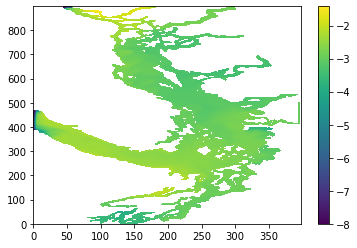

In [6]:
fig,ax=plt.subplots()
m=plt.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,np.log10(f5.variables['diatoms'][0,0,:,:])))
plt.colorbar(m)

In [8]:
np.min(np.ma.masked_where(tmask[0,0,350:600,200:350]==0,f5.variables['diatoms'][0,0,350:600,200:350]))

0.0001322707

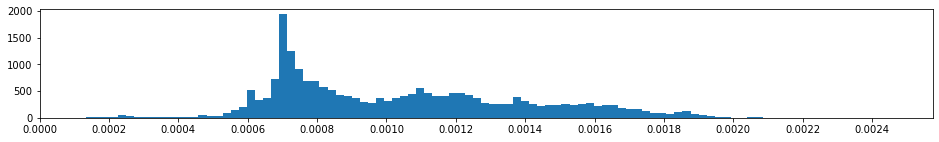

In [22]:
fig,ax=plt.subplots(1,1,figsize=(16,2))
ax.hist(np.ma.masked_where(tmask[0,0,350:600,200:350]==0,f5.variables['diatoms'][0,0,350:600,200:350]).flatten(),100);
ax.set_xticks(np.arange(0,.0025,.0002));

In [16]:
np.median(f5.variables['diatoms'][0,0,350:600,200:350][tmask[0,0,350:600,200:350]==1])

0.0009763126727193594

In [23]:
f6=nc.Dataset('/results/SalishSea/nowcast-green.201812/01jan17/SalishSea_1d_20170101_20170101_ptrc_T.nc')

<ipython-input-26-bc658902e285>:2: RuntimeWarning: divide by zero encountered in log10
  m=plt.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,np.log10(f6.variables['diatoms'][0,0,:,:])),


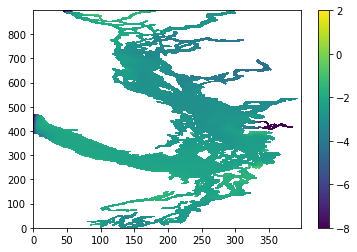

In [26]:
fig,ax=plt.subplots()
m=plt.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,np.log10(f6.variables['diatoms'][0,0,:,:])),
                vmin=-8,vmax=2)
plt.colorbar(m)

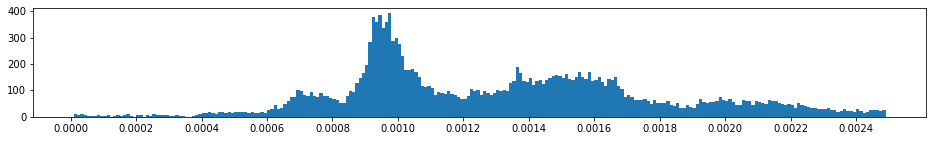

In [38]:
fig,ax=plt.subplots(1,1,figsize=(16,2))
ax.hist(np.ma.masked_where(tmask[0,0,350:600,200:350]==0,f6.variables['diatoms'][0,0,350:600,200:350]).flatten(),np.arange(.00001,.0025,.00001));
ax.set_xticks(np.arange(0,.0025,.0002));

In [34]:
np.median(f6.variables['diatoms'][0,0,350:600,200:350][tmask[0,0,350:600,200:350]==1])

/home/eolson/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.0014142135623842478

In [35]:
f7=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/rivers-climatology/bio/R201812_bioConst.nc')

In [37]:
for var in f7.variables.keys():
    print(var,np.max(f7.variables[var]))

no3 6.436952995231928
nh4 4.42713321781369
sil 58.65588785613488
dia 0.0
phy 0.0
mes 0.0
zoo 0.0
don 0.0
pon 0.0
bsi 0.0
tur 1.0


In [40]:
f8=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01jul17/SalishSea_1d_20170701_20170701_ptrc_T.nc')

In [41]:
f9=nc.Dataset('/results/SalishSea/nowcast-green.201812/01jul17/SalishSea_1d_20170701_20170701_ptrc_T.nc')

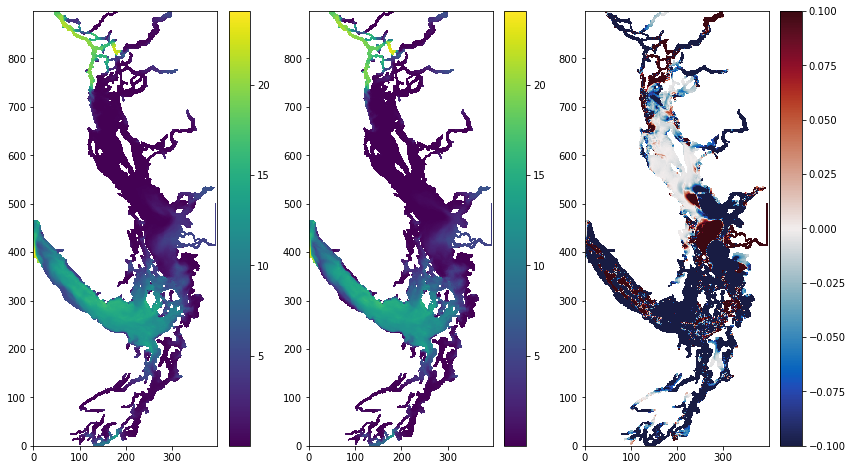

In [53]:
fig,ax=plt.subplots(1,3,figsize=(14,8))
m1=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f8.variables['nitrate'][0,0,:,:]))
plt.colorbar(m1,ax=ax[0])
m2=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f9.variables['nitrate'][0,0,:,:]))
plt.colorbar(m2,ax=ax[1])
m3=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f9.variables['nitrate'][0,0,:,:])\
                    -np.ma.masked_where(tmask[0,0,:,:]==0,f8.variables['nitrate'][0,0,:,:]),
                    vmin=-.1,vmax=.1,cmap=cmocean.cm.balance)
plt.colorbar(m3,ax=ax[2])

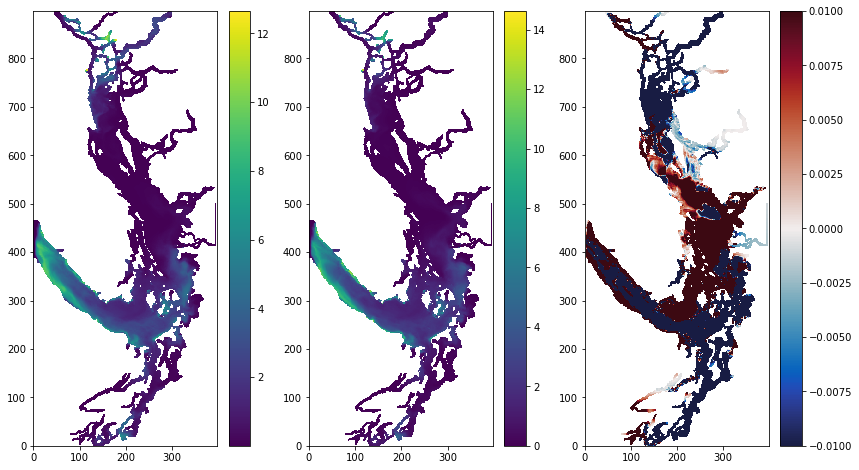

In [54]:
fig,ax=plt.subplots(1,3,figsize=(14,8))
m1=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f8.variables['diatoms'][0,0,:,:]))
plt.colorbar(m1,ax=ax[0])
m2=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f9.variables['diatoms'][0,0,:,:]))
plt.colorbar(m2,ax=ax[1])
m3=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f9.variables['diatoms'][0,0,:,:])\
                    -np.ma.masked_where(tmask[0,0,:,:]==0,f8.variables['diatoms'][0,0,:,:]),
                   vmin=-.01,vmax=.01,cmap=cmocean.cm.balance)
plt.colorbar(m3,ax=ax[2])

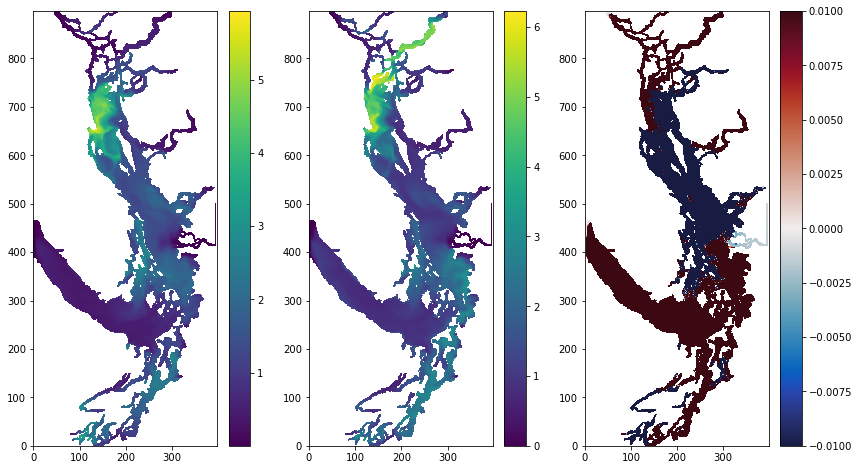

In [55]:
fig,ax=plt.subplots(1,3,figsize=(14,8))
m1=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f8.variables['flagellates'][0,0,:,:]))
plt.colorbar(m1,ax=ax[0])
m2=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f9.variables['flagellates'][0,0,:,:]))
plt.colorbar(m2,ax=ax[1])
m3=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f9.variables['flagellates'][0,0,:,:])\
                    -np.ma.masked_where(tmask[0,0,:,:]==0,f8.variables['flagellates'][0,0,:,:]),
                   vmin=-.01,vmax=.01,cmap=cmocean.cm.balance)
plt.colorbar(m3,ax=ax[2])